**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [5]:
df = pd.read_excel('Online Retail.xlsx', dtype={'CustomerID': str})
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


**Cohort Data Analysis Components**

1. Cohort date: The date of the first activity time started for each user (e.g. first installation day, first transaction date).
2. Current activity date: The activity recurrence time for each user (e.g. the second transaction date).
3. Total distinct subject: Total of distinct actors of measured activity group by cohort date and current activity date (e.g. total new user, totla new customer).
4. Period distance: The distance between cohort date and current activity date. The lowest is 0 and always be positive number.

In [9]:
# Example to show grouping result
df.groupby('CustomerID')['InvoiceDate'].min()

CustomerID
12346   2011-01-18 10:01:00
12347   2010-12-07 14:57:00
12348   2010-12-16 19:09:00
12349   2011-11-21 09:51:00
12350   2011-02-02 16:01:00
                ...        
18280   2011-03-07 09:52:00
18281   2011-06-12 10:53:00
18282   2011-08-05 13:35:00
18283   2011-01-06 14:14:00
18287   2011-05-22 10:39:00
Name: InvoiceDate, Length: 4372, dtype: datetime64[ns]

In [12]:
# Create cohort month
df['cohort_month'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-08
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-08
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-08
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-08


In [13]:
# Create current order month
df['current_order_month'] = df['InvoiceDate'].dt.to_period('M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month,current_order_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12


In [15]:
# Create cohort DataFrame
df_cohort = df.groupby(['cohort_month', 'current_order_month'])['CustomerID'].nunique().reset_index().rename(
                                                columns={'CustomerID': 'n_customers'}
                    )

df_cohort.head()

,cohort_month,current_order_month,n_customers
0,2010-12,2010-12,948
1,2010-12,2011-01,362
2,2010-12,2011-02,317
3,2010-12,2011-03,367
4,2010-12,2011-04,341


In [16]:
# Check total number of cohort
df_cohort['cohort_month'].nunique()

13

In [38]:
# Period distance in daily basis
period_distance = (df_cohort['current_order_month'].dt.to_timestamp() - df_cohort['cohort_month'].dt.to_timestamp()).dt.days
period_distance

0       0
1      31
2      62
3      90
4     121
     ... 
86     31
87     61
88      0
89     30
90      0
Length: 91, dtype: int64

In [39]:
# Convert period distance into monthly basis. Assumed that 1 month = 31 days.
import math

period_distance = period_distance.apply(lambda x: math.ceil(x/31))
period_distance

0     0
1     1
2     2
3     3
4     4
     ..
86    1
87    2
88    0
89    1
90    0
Length: 91, dtype: int64

In [40]:
# Add period_distance column on df_cohort
df_cohort['period_distance'] = period_distance
df_cohort.head()

,cohort_month,current_order_month,n_customers,period_distance
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4


In [76]:
# Create an initial pivot table
df_cohort_pivot = df_cohort.pivot_table(
                        index='cohort_month',
                        columns='period_distance',
                        values='n_customers'
)

df_cohort_pivot

period_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Create initial month of purchasing variable
initial_month = df_cohort_pivot[0]
initial_month

cohort_month
2010-12    948.0
2011-01    421.0
2011-02    380.0
2011-03    440.0
2011-04    299.0
2011-05    279.0
2011-06    235.0
2011-07    191.0
2011-08    167.0
2011-09    298.0
2011-10    352.0
2011-11    321.0
2011-12     41.0
Freq: M, Name: 0, dtype: float64

In [58]:
# Convert the values of pivot table into percentage.
# Column 1 to 12 is divided by column 0.

df_cohort_pivot = df_cohort_pivot.loc[:, 0:12].apply(lambda x: round((x/initial_month*100), 1))
df_cohort_pivot

period_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2010-12,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Another way to convert into percentage by using 'divide'
df_cohort_pct = round(df_cohort_pivot.divide(initial_month, axis=0)*100, 1)
df_cohort_pct

period_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2010-12,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
df_cohort_pivot2 = df_cohort_pivot.loc[:, 0:12].apply(lambda x: (x/initial_month))
df_cohort_pivot2

period_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


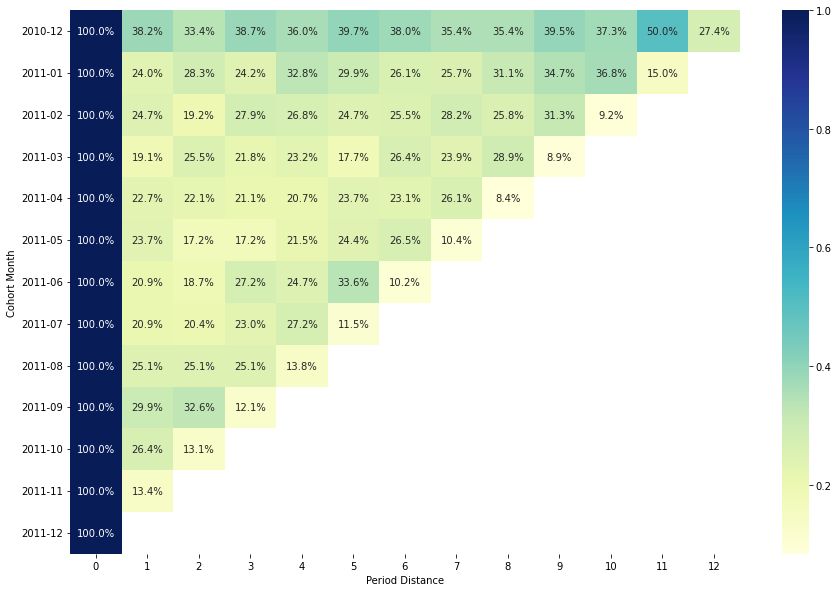

In [117]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_cohort_pivot2, cmap='YlGnBu', annot=True, fmt='.1%')
plt.xlabel('Period Distance')
plt.ylabel('Cohort Month')
plt.yticks(rotation=0)
plt.show()

In [118]:
df_cohort

,cohort_month,current_order_month,n_customers,period_distance
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4
...,...,...,...,...
86,2011-10,2011-11,93,1
87,2011-10,2011-12,46,2
88,2011-11,2011-11,321,0
89,2011-11,2011-12,43,1


In [122]:
df_cohort['n_customers_init'] = df_cohort.groupby('cohort_month')['n_customers'].transform('max')
df_cohort.head()

,cohort_month,current_order_month,n_customers,period_distance,n_customers_init
0,2010-12,2010-12,948,0,948
1,2010-12,2011-01,362,1,948
2,2010-12,2011-02,317,2,948
3,2010-12,2011-03,367,3,948
4,2010-12,2011-04,341,4,948


In [124]:
df_cohort['n_customers_pct'] = round((df_cohort['n_customers'] / df_cohort['n_customers_init'] * 100), 1)
df_cohort.head()

,cohort_month,current_order_month,n_customers,period_distance,n_customers_init,n_customers_pct
0,2010-12,2010-12,948,0,948,100.0
1,2010-12,2011-01,362,1,948,38.2
2,2010-12,2011-02,317,2,948,33.4
3,2010-12,2011-03,367,3,948,38.7
4,2010-12,2011-04,341,4,948,36.0


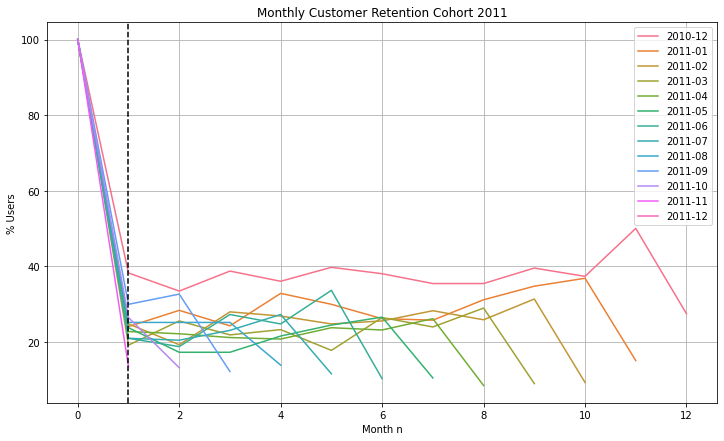

In [128]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='period_distance', y='n_customers_pct', hue='cohort_month', data=df_cohort)
plt.legend(loc='upper right')
plt.axvline(x=1, ls='--', color='black')
plt.xlabel('Month n')
plt.ylabel('% Users')
plt.title('Monthly Customer Retention Cohort 2011')
plt.grid();

<hr>